# Panalysis Business Analytics Case Study

**Author** Indraja Bandla


**Background**
A client of Panalysis is a publisher who has been running email marketing newsletters for a number of
years. These newsletters contain 24 different email lists and a subscriber may join one or more of these
lists.
The client sends email to these lists with different frequencies throughout the year (weekly, monthly, daily).
They use Campaign Monitor https://www.campaignmonitor.com/ to manage the subscribers and distribute
the email newsletters.
Our client has requested that Panalysis provide a report that addresses the following:
1. We have customers/personas that interact with us across a range of different services at
different times.
2. The audience is not exclusive to one website / email newsletter. By fragmenting our channels,
we lose the opportunity to build a collective audience and get to know them better and
potentially serve more targeted content in the future.
3. Fragmenting our newsletters is inefficient, and results in an inconsistent experience for our
customers.
4. The client needs to know which lists are most frequently subscribed to and whether to
decommission some newsletters and how they might potentially combine content.

**Task**
Please prepare a short report and presentation.
Use the data in the csv (see link below) to develop your methodology, and prepare a presentation on your
results to address the following:
1. How would you address the client's comments and questions above?
2. Provide descriptive statistics for each list.
3. How many subscribers are subscribed to more than one list?
4. Where a subscriber has joined more than one newsletter which combinations of lists are
subscribed to. E.g. if a subscriber has joined Artists in Australia and Balkan News and another
has joined Artists in Australia, Dog Walkers Weekly these can be represented as pairs A,B and
A,D.
5. Which lists have the greatest differences in the people who subscribe to them? E.g. People who
subscribe to Balkan News very rarely subscribe to Artists in Australia.
6. Which lists have the highest unsubscription rate.

**Please also address the following:**

● Describe how would you obtain the information from Campaign Monitor. See
https://help.campaignmonitor.com/support

● Describe the methodology you would use to tackle the questions above

The data can be downloaded from:
https://drive.google.com/file/d/0ByKnfbezExf4YmcydjVvaGNyMXc/view?usp=sharing

You are free to choose whichever tools you prefer to use to answer the questions above.

**About the Data**
The data is in a CSV file format.


| Field  | Description | Example Values         
| :- |-------------: | :-:
|DateAddedToList| The date that the subscriber was added to the list.Note that this may not be when they actually subscribed but rather when the owner of the list loaded this data into the software application | 10/04/2014 15:44
| SubscriberID | The unique identifier for this subscriber. Note that a subscriber can be subscribed to one or more lists. | ad0d6c7da2659ceda6c14c73ab3d5565e7427371a3ea4c0a6f9ab733cb47cb31
|ListID |The name of the mailing list.Note that these are fictional names.|Artists in Australia,Balkan News ,Columbian Comedy ,Dog Walkers, Weekly...
|CurrentStatus|The current status of the user.Note only subscribers marked as Active will receive email from the list.|Active, Bounced ,Unconfirmed ,Suppressed ,Deleted


- [EDA](#common)
- [Data Visualisation](#vis)
- [How to address client comments](#client)
- [Descriptive Statstics](#stats)
- [Unsubscription lists for entire dataset](#unsub)
- [How many subscribers are subscribed to more than one list?](#more>1)
- [Where a subscriber has joined more than one newsletter ](#A,D)
- [Which lists have the greatest differences in the people who subscribe to them](#combi)

<a id='common'></a> 
# Exploratory Data Analysis 

I downloaded the csv file and noticed the following:
- It is the data of four years(2012,2013,2014,2015)
- It has around 189,155 rows with four columns as mentioned


In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

In [4]:
data=pd.read_csv('./datasets/subscribers_list.csv')

In [5]:
data['year'] = pd.DatetimeIndex(data['DateAddedToList']).year

In [6]:
data['month'] = pd.DatetimeIndex(data['DateAddedToList']).month
data['day'] = pd.DatetimeIndex(data['DateAddedToList']).day

In [162]:
# I splitted DateAddedToList into year,month,day for analysis

In [161]:
data.head()

,DateAddedToList,SubscriberID,ListID,CurrentStatus,year,month,day
0,10/04/2014 15:44,69bd8f10a8f512f11cc5e15b1fb177a46395c93f6553fc...,Artists in Australia,Unsubscribed,2014,10,4
1,10/04/2014 9:40,5e8ce7d6a2fed0e786f994a4deb38ca9eb971120a86e4a...,Artists in Australia,Active,2014,10,4
2,10/04/2014 9:40,62725b4d21f794ce2ac455817fddf2b21ac0709ac02c62...,Artists in Australia,Active,2014,10,4
3,10/04/2014 9:40,e75180a3da23c7910810f1ca8998a9180f1897149adba8...,Artists in Australia,Active,2014,10,4
4,10/04/2014 9:40,cbccb0b090324a44026c6135f122b2ca26ce08214ed4ed...,Artists in Australia,Active,2014,10,4


In [163]:
data.shape

(189155, 7)

In [164]:
len(data['SubscriberID'].unique())


108858

108858 unique Subscriber id's are present in the dataset

In [6]:
data.isnull().sum() # data has no null values

DateAddedToList    0
SubscriberID       0
ListID             0
CurrentStatus      0
dtype: int64

In [165]:
data.dtypes #datatypes

DateAddedToList    object
SubscriberID       object
ListID             object
CurrentStatus      object
year                int32
month               int32
day                 int32
dtype: object

In [166]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189155 entries, 0 to 189154
Data columns (total 7 columns):
DateAddedToList    189155 non-null object
SubscriberID       189155 non-null object
ListID             189155 non-null object
CurrentStatus      189155 non-null object
year               189155 non-null int32
month              189155 non-null int32
day                189155 non-null int32
dtypes: int32(3), object(4)
memory usage: 7.9+ MB


<a id='vis'></a>
# Data Visualisation

The beauty of Tableau dashboard can not be viewed on Github.Unfortunately, the Ipython notebook needs to de downloaded.you can view it my tableau public here https://public.tableau.com/shared/9PQHX35TT?:display_count=yes

In [19]:
%%HTML
<div class='tableauPlaceholder' id='viz1498263985429' style='position: relative'><noscript><a href='#'><img alt='EDA ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9P&#47;9PQHX35TT&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='shared&#47;9PQHX35TT' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9P&#47;9PQHX35TT&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1498263985429');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1020px';vizElement.style.height='1033px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<a id='client'></a>
# 1. How would you address the client's comments and questions above?


In [270]:
data['DateAddedToList'].unique()

array(['10/04/2014 15:44', '10/04/2014 9:40', '10/11/2014 12:30', ...,
       '11/12/2015 14:03', '11/12/2015 14:32', '11/12/2015 14:48'], dtype=object)

In [272]:
data['SubscriberID'].unique()

array(['69bd8f10a8f512f11cc5e15b1fb177a46395c93f6553fc695402690c4ef4e1dd',
       '5e8ce7d6a2fed0e786f994a4deb38ca9eb971120a86e4a481ed1ff04e4435e93',
       '62725b4d21f794ce2ac455817fddf2b21ac0709ac02c6275aa911ec08fb8651d',
       ...,
       '117f221d1c679fda6fc3bc7faac175e50609ee92101501efc88d6700a14fa69a',
       '5bff276dcf7cf3c64742fb4f218ec79dbe4ba650421758d78a32769c9a4f92a9',
       '1675a5cf980da3a29255bd2a0a68778b9c8314f39c3082df1dd3759b8689cf42'], dtype=object)

In [274]:
len(data['SubscriberID'].unique())

108858

In [273]:
data['ListID'].unique()

array(['Artists in Australia', 'Balkan News', 'Columbian Comedy',
       'Dog Walkers Weekly', 'Epicurean Delights', 'Fishing with Friends',
       'Gardening and Greenery', 'Hobbies for Profit',
       'Iguana Lovers Monthly', 'Jalopeno Recipe of the Week',
       'Kyoto Siteseeing', 'Llama Keepers', 'Monkey Madness',
       'Nautical Novels', 'Obscure Fact of the Day', 'Planets and Stars',
       'Quesadilla Recipies', 'Radical Reading',
       'Shopping Bargin of the Day', 'Train Trips in the Ukraine',
       'Underground Art', 'Very Funky Finds', 'Xtraordinarly GR8',
       'Your Health Tips'], dtype=object)

- ** #1. We have customers/personas that interact with us across a range of different services at different times **

> This clearly shows that multiple subscribers (108,858 subscribers) are subscribed to 24 different email list in  different years (2012,2013,2014,2015) at different times


- ** #2. The audience is not exclusive to one website / email newsletter. By fragmenting our channels, we lose the opportunity to build a collective audience and get to know them better and potentially serve more targeted content in the future **

> we have total of 189155 records but only 108,858 unique subscribers to 24 different emails .This clearly shows that each subscribed more than one list.There seems to be many possibilities.


- ** #3. Fragmenting our newsletters is inefficient, and results in an inconsistent experience for our customers.**

> From analysis amount of people who subscribe to multiple lists decreases as the number of lists grows.



- **#4.The client needs to know which lists are most frequently subscribed to and whether to decommission some newsletters and how they might potentially combine content.**

> From my EDA through Tableau, It is clear that active subscribers are interested in " Your Health Tips " followed by "Underground Art" and  " Madness monkey" .

> "Jalapeno Receipe of the week" has the least number of active subscribers(117) which can be decommisioned.

> Questions 2,3,4 are analysed in this visualistion 
- https://public.tableau.com/views/Subscriber_2/Combinations?:embed=y&:display_count=yes

<a id='stats'></a>
# 2.Provide descriptive statistics for each list 

In [7]:
data.describe() # overall descriptive statstics

,DateAddedToList,SubscriberID,ListID,CurrentStatus
count,189155,189155,189155,189155
unique,46547,108858,24,6
top,22/08/2012 11:44,5c8eef5243e2fe73481509a4d9834f3a706d4503a81241...,Your Health Tips,Active
freq,18755,19,34007,130623


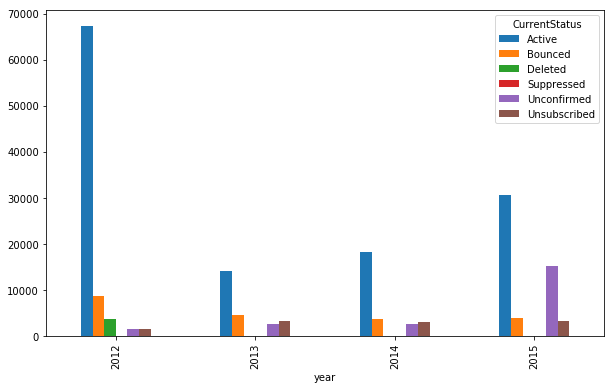

In [6]:
data.groupby(['year','CurrentStatus']).size().unstack().plot(kind='bar',figsize=(10,6))

- The descriptive statistics of every list can be viewed here https://github.com/Indu4191/test/blob/master/Panalysis%20descriptive%20statstics.ipynb  or
check **" Panalysis descriptive statistics.ipynb "** from the same folder

- The table shows the count, number of unique values, top (most common value), frequency (most common value’s frequency)
- The bar plots show which years the list is in active/Bounced/Unconfirmed/Suppressed/Deleted

<a id='unsub'></a>
# Unsubscription lists for entire dataset

In [342]:
rate['Rate']= (rate['Unsubscribed']/(rate['Active']+rate['Unsubscribed']))*100

rate



,Active,Unsubscribed,Rate,list
0,2084,109.0,4.970360,Artists in Australia
1,1084,46.0,4.070796,Balkan News
2,1958,8.0,0.406918,Columbian Comedy
3,10996,743.0,6.329330,Dog Walkers Weekly
4,6943,673.0,8.836660,Epicurean Delights
5,1136,23.0,1.984469,Fishing with Friends
6,3477,1199.0,25.641574,Gardening and Greenery
7,1752,41.0,2.286670,Hobbies for Profit
8,13054,2320.0,15.090412,Iguana Lovers Monthly
9,117,2.0,1.680672,Jalopeno Recipe of the Week


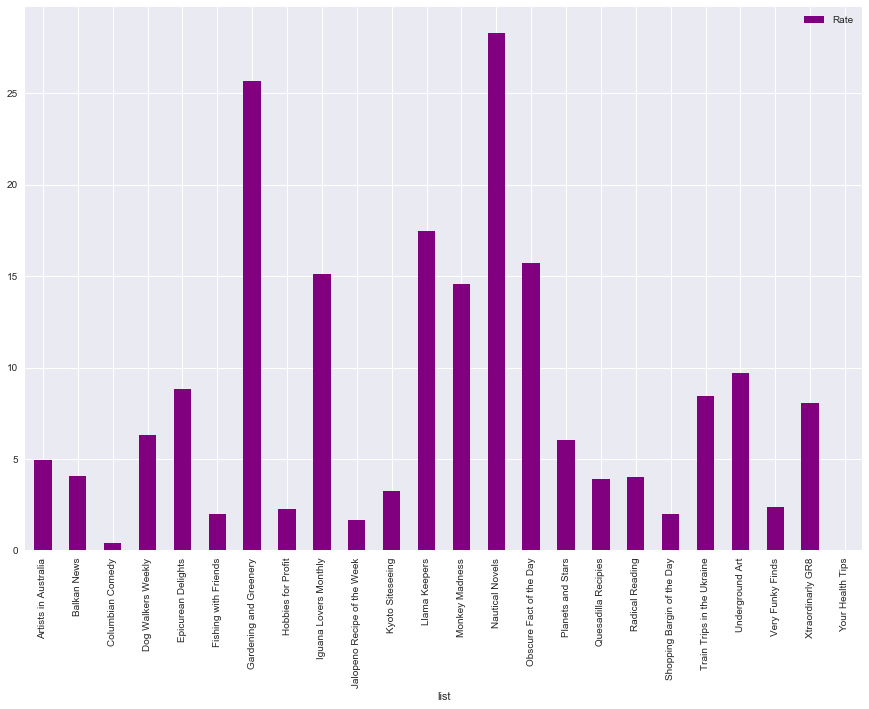

In [358]:
rate.plot(x='list',y='Rate',kind='bar',color='purple',figsize=(15,10))

The graph clearly shows that **Nautical Novels** has highest unsubscription rate of 28.303655 followed by **Gardening and Greenery** with 25.641574

you can view detail analysis here :https://github.com/Indu4191/test/blob/master/highest%20Unsubscription%20rate.ipynb

<a id='more>1'></a>
# 3. How many subscribers are subscribed to more than one list?

In [2]:
from collections import Counter
count2=Counter(combi_data.SubscriberID)
#combi_data is the data of the active subscribers

In [25]:
d1 = dict((k, v) for k, v in count2.items() if v >= 2)

In [26]:
len(d1)

20956

out of 108858 unique Subscribers,130623 are the active subscribers.Among active subscribers, 20,956 subscribers subscribed to more than one list

<a id='A,D'></a>
# 4. Where a subscriber has joined more than one newsletter which combinations of lists are subscribed to. E.g. if a subscriber has joined Artists in Australia and Balkan News and another has joined Artists in Australia, Dog Walkers Weekly these can be represented as pairs A,B and A,D.


In [7]:
#considering only Active Subscribers
combi_data=data[data['CurrentStatus']=='Active']

In [8]:
combinat=combi_data.groupby(['SubscriberID']).ListID.sum().value_counts()
combinat=pd.DataFrame(combinat)

combinat.head(25)

,ListID
Your Health Tips,18384
Underground Art,9807
Monkey Madness,6822
Iguana Lovers Monthly,3472
Quesadilla Recipies,2719
Xtraordinarly GR8,2664
Epicurean Delights,2509
Iguana Lovers MonthlyYour Health Tips,2461
Dog Walkers Weekly,2278
Train Trips in the Ukraine,2112


These are top 25 combinations of all the list ids. "Your Health Tips" has more subscribers exclusively with 18,384 subscribers.However, if combinations are considered "Your Health Tips" along with "Iguana Lovers Monthly " seems to be the combinations with the highest number of subscribers.

All the top combinations have "Your Health Tips" as one of the lists.

In [9]:
combinat.tail(25)

,ListID
Artists in AustraliaBalkan NewsEpicurean DelightsIguana Lovers MonthlyMonkey MadnessUnderground ArtYour Health Tips,1
Artists in AustraliaEpicurean DelightsGardening and GreeneryMonkey MadnessShopping Bargin of the DayTrain Trips in the UkraineUnderground ArtYour Health Tips,1
Dog Walkers WeeklyIguana Lovers MonthlyRadical ReadingTrain Trips in the Ukraine,1
Balkan NewsDog Walkers WeeklyEpicurean DelightsIguana Lovers MonthlyMonkey MadnessShopping Bargin of the DayUnderground ArtYour Health Tips,1
Dog Walkers WeeklyEpicurean DelightsGardening and GreeneryKyoto SiteseeingLlama KeepersMonkey MadnessUnderground ArtYour Health Tips,1
Dog Walkers WeeklyEpicurean DelightsIguana Lovers MonthlyMonkey MadnessNautical NovelsShopping Bargin of the DayTrain Trips in the UkraineUnderground ArtXtraordinarly GR8Your Health Tips,1
Llama KeepersShopping Bargin of the DayUnderground ArtYour Health Tips,1
Dog Walkers WeeklyEpicurean DelightsHobbies for ProfitIguana Lovers MonthlyXtraordinarly GR8,1
Artists in AustraliaDog Walkers WeeklyEpicurean DelightsIguana Lovers MonthlyUnderground Art,1
Epicurean DelightsGardening and GreeneryLlama KeepersTrain Trips in the UkraineYour Health Tips,1


In [ ]:
These lists are active but their combinations donot 

In [246]:
len(pd.DataFrame(combinat))

2208

<a id='combi'></a>
# 5. Which lists have the greatest differences in the people who subscribe to them? E.g. People who subscribe to Balkan News very rarely subscribe to Artists in Australia.

you can view here https://public.tableau.com/shared/T3QYJCQB4?:display_count=yes

In [18]:
%%HTML
<div class='tableauPlaceholder' id='viz1498266413429' style='position: relative'><noscript><a href='#'><img alt='Combinations ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Subscriber_2&#47;Combinations&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Subscriber_2&#47;Combinations' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Subscriber_2&#47;Combinations&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1498266413429');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Please also address the following:

● **Describe how would you obtain the information from Campaign Monitor. See https://help.campaignmonitor.com/support **

- I signed up and created an account in campaign monitor site.I have verified my email address.Then i used the following code in terminal window

import createsend
curl -u "69e35249484b8bd3057939c777511cf742ffe6d9a526f147:x" https://api.createsend.com/api/v3.1/clients.json\?pretty\=true

- I got my ClientID and apikey as follows
 - clientID: 646efa6184a25c52d844af3adaeea84d                        
 - apiKey: 69e35249484b8bd3057939c777511cf742ffe6d9a526f147
 
since I did not have any data, nothing was found
 
I tried the following code in python but it result me that i am unauthorized

from createsend import *
cs = CreateSend({'api_key': '69e35249484b8bd3057939c777511cf742ffe6d9a526f147'})
clients = cs.clients()

● ** Describe the methodology you would use to tackle the questions above **

- I used Python and Tableau for Analysis and Data Visualisation.
- I performed basic Exploratory Data Analysis to know my data set using python.
- I also used Tableau for EDA.I figured out the value counts of ListIDs, Current Status, Data Entered Year etc.,
- I considered active subscriber list to check how many subscribers subscribed to more than one list
- https://public.tableau.com/views/Subscriber_2/Combinations?:embed=y&:display_count=yes visualisation gives answers for the following
> - Fragmenting the newsletters is inefficient and results in an inconsistent experience for our customers.
  - Lists which are most frequently subscribed to and whether to decommission some newsletters and how they might        potentially combine content.
  - Fragmenting the channels make the client lose the opportunity to build a collective audience and get to know them better and potentially serve more targeted content in the future.


